In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [103]:
df_loan=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv")

In [104]:
df_loan["loan_status"].value_counts(normalize=True)

PAIDOFF       0.751445
COLLECTION    0.248555
Name: loan_status, dtype: float64

In [105]:
df_loan.groupby("Gender")["loan_status"].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [106]:
df_loan["due_date"]=pd.to_datetime(df_loan["due_date"])

In [107]:
df_loan["effective_date"]=pd.to_datetime(df_loan["effective_date"])

In [108]:
df_loan.groupby(["education","Gender"])["loan_status"].value_counts(normalize=True)

education             Gender  loan_status
Bechalor              female  PAIDOFF        1.000000
                      male    PAIDOFF        0.676471
                              COLLECTION     0.323529
High School or Below  female  PAIDOFF        0.800000
                              COLLECTION     0.200000
                      male    PAIDOFF        0.732824
                              COLLECTION     0.267176
Master or Above       male    COLLECTION     0.500000
                              PAIDOFF        0.500000
college               female  PAIDOFF        0.863636
                              COLLECTION     0.136364
                      male    PAIDOFF        0.748031
                              COLLECTION     0.251969
Name: loan_status, dtype: float64

## Data Visualization and Feature Extraction

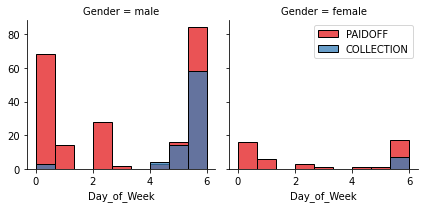

In [109]:
df_loan["Day_of_Week"]=df_loan["effective_date"].dt.dayofweek
bins=np.linspace(df_loan["Day_of_Week"].min(),df_loan["Day_of_Week"].max(),10)
g=sns.FacetGrid(df_loan,col="Gender",hue="loan_status",palette="Set1",col_wrap=2)
g.map(sns.histplot,"Day_of_Week",bins=bins)
plt.legend()
plt.show()

In [110]:
df_loan["Gender"].value_counts()

male      294
female     52
Name: Gender, dtype: int64

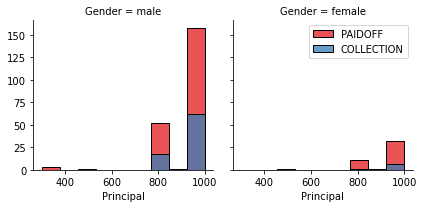

In [111]:
bins=np.linspace(df_loan["Principal"].min(),df_loan["Principal"].max(),10)
g=sns.FacetGrid(df_loan,col="Gender",hue="loan_status",palette="Set1",col_wrap=2)
g.map(sns.histplot,"Principal",bins=bins)
plt.legend()
plt.show()

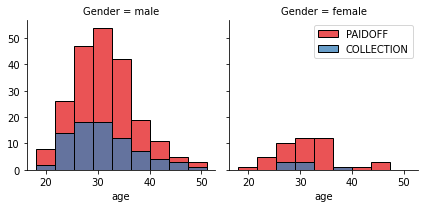

In [112]:
bins=np.linspace(df_loan["age"].min(),df_loan["age"].max(),10)
g=sns.FacetGrid(df_loan,col="Gender",hue="loan_status",palette="Set1",col_wrap=2)
g.map(sns.histplot,"age",bins=bins,ec="black")
plt.legend()
plt.show()

In [113]:
df_loan["WeekEnd"]=df_loan["Day_of_Week"].apply(lambda x: 1 if x>3 else 0)

In [114]:
df_loan

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,Day_of_Week,WeekEnd
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6,1
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6,1
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,0
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,0


In [115]:
df_loan[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,male,High School or Below
1,1000,30,33,female,Bechalor
2,1000,15,27,male,college
3,1000,30,28,female,college
4,1000,30,29,male,college


In [116]:
Feature = df_loan[['Principal','terms','age','Gender','WeekEnd']]
Feature = pd.concat([Feature,pd.get_dummies(df_loan['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()
Feature["Gender"].replace(to_replace=["male","female"],value=[0,1],inplace=True)

In [117]:
Feature

,Principal,terms,age,Gender,WeekEnd,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,0,1,0,1,0
342,1000,30,25,0,1,0,1,0
343,800,15,39,0,0,0,0,1
344,1000,30,28,0,0,0,0,1


In [118]:
df_loan["loan_status"].replace(to_replace=["COLLECTION","PAIDOFF"],value=[0,1],inplace=True)

## Evaluation

In [119]:
X=Feature
Y=df_loan["loan_status"].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2,test_size=0.2)

### Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression
log_clf=LogisticRegression(max_iter=1000)
log_clf.fit(X_train,Y_train)
print("Score of Logistic Regression:","%.2f"%(100*(log_clf.score(X_test,Y_test))))

Score of Logistic Regression: 78.57


### Support Vector Machine

In [122]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train,Y_train)
print("Score of Support Vector Machine:","%.2f"%(100*(svm_clf.score(X_test,Y_test))))

Score of Support Vector Machine: 82.86


### Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,Y_train)
print("Score of Decision Tree:","%.2f"%(100*(dt_clf.score(X_test,Y_test))))

Score of Decision Tree: 68.57


### K Nearest Neighbor(KNN)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
parameters={"n_neighbors":np.arange(1,50),"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],"p":[1,2]}
knn_clf=KNeighborsClassifier()
knn_reg=GridSearchCV(knn_clf,parameters,cv=10)
knn_reg.fit(X_train,Y_train)
print(knn_reg.best_params_)

{'algorithm': 'auto', 'n_neighbors': 26, 'p': 2}


In [125]:
print("Score of K Nearest Neighbor:","%.2f"%(100*(knn_reg.score(X_test,Y_test))))

Score of K Nearest Neighbor: 72.86


In [126]:
test_df=pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv")
test_df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male
5,37,37,PAIDOFF,700,15,9/11/2016,9/25/2016,33,High School or Below,male
6,38,38,PAIDOFF,1000,15,9/11/2016,9/25/2016,24,college,male
7,48,48,PAIDOFF,1000,30,9/11/2016,10/10/2016,32,Bechalor,male
8,50,50,PAIDOFF,800,15,9/11/2016,9/25/2016,27,college,female
9,61,61,PAIDOFF,1000,15,9/11/2016,9/25/2016,37,college,male


In [131]:
test_df["due_date"]=pd.to_datetime(test_df["due_date"])
test_df["effective_date"]=pd.to_datetime(test_df["effective_date"])
test_df["Day_of_Week"]=test_df["effective_date"].dt.dayofweek
test_df["WeekEnd"]=test_df["Day_of_Week"].apply(lambda x: 1 if x>3 else 0)
Feature_test = test_df[['Principal','terms','age','Gender','WeekEnd']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test["Gender"].replace(to_replace=["male","female"],value=[0,1],inplace=True)
test_df["loan_status"].replace(to_replace=["COLLECTION","PAIDOFF"],value=[0,1],inplace=True)

In [132]:
X_Test=Feature_test
Y_Test=test_df["loan_status"].values

## Testing the Model

In [133]:
Y_pred_log=log_clf.predict(X_Test)
Y_pred_svm=svm_clf.predict(X_Test)
Y_pred_dt=dt_clf.predict(X_Test)
Y_pred_knn=knn_reg.predict(X_Test)


### Logistisc Regression

In [147]:
J_log=jaccard_score(Y_Test,Y_pred_log)
f1_log=f1_score(Y_Test,Y_pred_log)
log_loss_mertic=log_loss(Y_Test,Y_pred_log)

### Support Vector Machine

In [137]:
J_svm=jaccard_score(Y_Test,Y_pred_svm)
f1_svm=f1_score(Y_Test,Y_pred_svm)

### Decision Tree

In [138]:
J_dt=jaccard_score(Y_Test,Y_pred_dt)
f1_dt=f1_score(Y_Test,Y_pred_dt)

### KNN

In [140]:
J_knn=jaccard_score(Y_Test,Y_pred_knn)
f1_knn=f1_score(Y_Test,Y_pred_knn)

In [148]:
Metrics_arr=[["Logistisc Regression",J_log,f1_log,log_loss_mertic],["Support Vector Machine",J_svm,f1_svm,"N/A"],["Decision Tree",J_dt,f1_dt,"N/A"],["KNN",J_knn,f1_knn,"N/A"]]
Metrics_df=pd.DataFrame(Metrics_arr,columns=["Algorithm","Jaccard","F1-score","Log_Loss"])

In [149]:
Metrics_df.to_csv("Metrics.csv")

In [150]:
Metrics_df

,Algorithm,Jaccard,F1-score,Log_Loss
0,Logistisc Regression,0.735849,0.847826,8.95469
1,Support Vector Machine,0.740741,0.851064,N/A
2,Decision Tree,0.711111,0.831169,N/A
3,KNN,0.750000,0.857143,N/A
